In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import math as mt
from joblib import dump, load
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
obs = load('TS2dataObs.joblib') 
LR= load('TS2dataLR.joblib')
SVR=load('TS2dataSVR.joblib')
GB=load('TS2dataGB.joblib')
CNN=load('TS2dataCNN.joblib')

<xarray.DataArray 'fogdata' (time: 1922)>
array([0.16, 0.28, 0.32, ..., 0.76, 0.72, 0.76])
Coordinates:
  * time     (time) datetime64[ns] 1984-01-01 1984-01-02 ... 2014-12-31

<xarray.DataArray 'fogdata' (time: 248)>
array([0.24, 0.32, 0.44, 0.4 , 0.32, 0.48, 0.64, 0.68, 0.56, 0.44, 0.48,
       0.44, 0.56, 0.52, 0.56, 0.52, 0.44, 0.44, 0.52, 0.64, 0.72, 0.44,
       0.24, 0.48, 0.6 , 0.36, 0.52, 0.52, 0.36, 0.16, 0.12, 0.4 , 0.24,
       0.24, 0.24, 0.28, 0.52, 0.6 , 0.64, 0.6 , 0.32, 0.4 , 0.48, 0.44,
       0.32, 0.2 , 0.24, 0.36, 0.4 , 0.2 , 0.36, 0.28, 0.32, 0.36, 0.32,
       0.16, 0.16, 0.16, 0.24, 0.32, 0.44, 0.48, 0.56, 0.56, 0.44, 0.44,
       0.36, 0.4 , 0.48, 0.48, 0.24, 0.2 , 0.44, 0.32, 0.4 , 0.4 , 0.52,
       0.36, 0.52, 0.44, 0.48, 0.44, 0.56, 0.44, 0.76, 0.6 , 0.48, 0.52,
       0.44, 0.48, 0.48, 0.32, 0.4 , 0.6 , 0.6 , 0.72, 0.48, 0.56, 0.72,
       0.76, 0.8 , 0.64, 0.64, 0.72, 0.76, 0.76, 0.76, 0.52, 0.52, 0.68,
       0.36, 0.28, 0.28, 0.28, 0.6 , 0.68, 0.68, 0.68, 0.52, 0.56, 0.64,
       0.64, 0.68, 0.64, 0.64, 0.64, 0.64, 0.8 , 0.8 , 0.72, 0.48, 0.32,
       0.48, 0.12, 0.16, 0.24, 0.28, 0.4 , 0.24, 0.28, 0.56, 0.64, 0.56,
       0.28, 0.24, 0.36, 0.32, 0.24, 0.32, 0.24, 0.12, 0.4 , 0.4 , 0.72,
       0.72, 0.2 , 0.12, 0.12, 0.12, 0.12, 0.12, 0.08, 0.  , 0.08, 0.16,
       0.  , 0.2 , 0.32, 0.44, 0.36, 0.24, 0.2 , 0.16, 0.4 , 0.52, 0.56,
       0.6 , 0.28, 0.48, 0.52, 0.48, 0.64, 0.6 , 0.56, 0.68, 0.68, 0.68,
       0.76, 0.76, 0.6 , 0.68, 0.8 , 0.68, 0.52, 0.68, 0.64, 0.48, 0.48,
       0.52, 0.52, 0.44, 0.4 , 0.68, 0.68, 0.56, 0.48, 0.44, 0.4 , 0.44,
       0.24, 0.56, 0.64, 0.6 , 0.64, 0.64, 0.28, 0.16, 0.16, 0.2 , 0.12,
       0.2 , 0.2 , 0.24, 0.28, 0.32, 0.2 , 0.2 , 0.12, 0.16, 0.2 , 0.2 ,
       0.04, 0.08, 0.04, 0.2 , 0.28, 0.36, 0.4 , 0.36, 0.28, 0.28, 0.24,
       0.32, 0.2 , 0.16, 0.24, 0.36, 0.36])
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2018-12-31

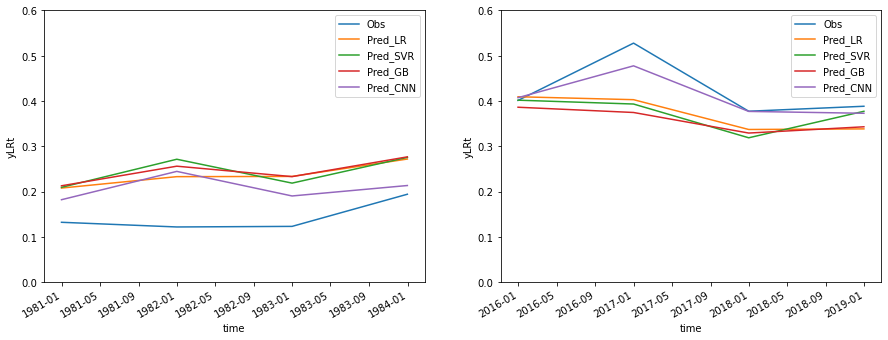

In [17]:
fig = plt.figure(figsize=[15,5])
ax = fig.add_subplot(122)
obs.sel(time=slice('2015-1-1','2018-12-31')).resample(time='1Y').mean().plot(label='Obs')
LR.sel(time=slice('2015-1-1','2018-12-31')).resample(time='1Y').mean().plot(label='Pred_LR')
SVR.sel(time=slice('2015-1-1','2018-12-31')).resample(time='1Y').mean().plot(label='Pred_SVR')
GB.sel(time=slice('2015-1-1','2018-12-31')).resample(time='1Y').mean().plot(label='Pred_GB')
CNN.sel(time=slice('2015-1-1','2018-12-31')).resample(time='1Y').mean().plot(label='Pred_CNN')
plt.ylim(0, 0.6)
plt.legend()

ax2 = fig.add_subplot(121)
obs.sel(time=slice('1980-1-1','1983-12-31')).resample(time='1Y').mean().plot(label='Obs')
LR.sel(time=slice('1980-1-1','1983-12-31')).resample(time='1Y').mean().plot(label='Pred_LR')
SVR.sel(time=slice('1980-1-1','1983-12-31')).resample(time='1Y').mean().plot(label='Pred_SVR')
GB.sel(time=slice('1980-1-1','1983-12-31')).resample(time='1Y').mean().plot(label='Pred_GB')
CNN.sel(time=slice('1980-1-1','1983-12-31')).resample(time='1Y').mean().plot(label='Pred_CNN')
plt.ylim(0, 0.6)
plt.legend()

plt.savefig('TS2.jpeg')
plt.show()

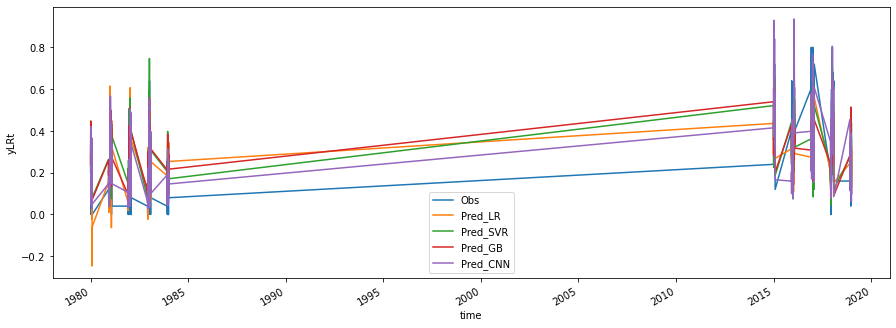

In [4]:
plt.figure(figsize=[15,5])
obs.plot(label='Obs')
LR.plot(label='Pred_LR')
SVR.plot(label='Pred_SVR')
GB.plot(label='Pred_GB')
CNN.plot(label='Pred_CNN')
#plt.ylim(0, 0.6)
plt.legend()
plt.savefig('TS3.jpeg')
plt.show()

In [5]:
obs = load('TS1dataObs.joblib') 
LR= load('TS1dataLR.joblib')
SVR=load('TS1dataSVR.joblib')
GB=load('TS1dataGB.joblib')
CNN=load('TS1dataCNN.joblib')

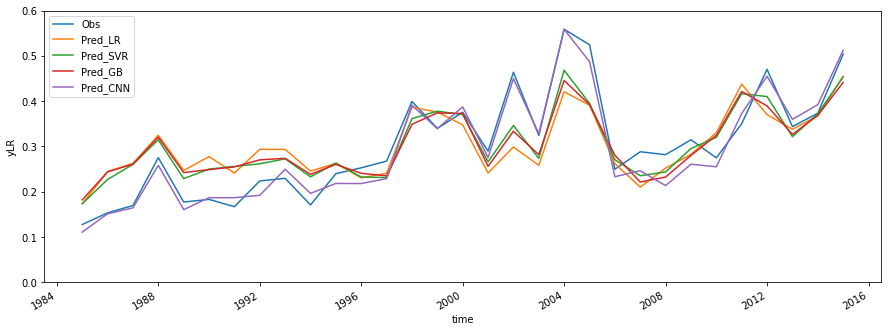

In [6]:
plt.figure(figsize=[15,5])
obs.resample(time='1Y').mean().plot(label='Obs')
LR.resample(time='1Y').mean().plot(label='Pred_LR')
SVR.resample(time='1Y').mean().plot(label='Pred_SVR')
GB.resample(time='1Y').mean().plot(label='Pred_GB')
CNN.resample(time='1Y').mean().plot(label='Pred_CNN')
plt.ylim(0, 0.6)
plt.legend()
plt.savefig('TS1.jpeg')
plt.show()